>>> PROJETO: FILTRO PASSA-BAIXAS BUTTERWORTH DE 4ª ORDEM <<<

Função de Transferência H(s) do filtro de 4ª ordem obtida.
H(s) decomposta em 2 seções de 2ª ordem (SOS).


RELATÓRIO DE PROJETO: ESTÁGIO SALLEN-KEY LPF Nº 1
PARÂMETROS DA SEÇÃO DE 2ª ORDEM (SOS):
  - Frequência Natural (f₀): 1000.00 Hz
  - Fator de Qualidade (Q): 1.3066

VALORES CALCULADOS DOS COMPONENTES:
  - Resistores (R₁=R₂): 15.92 kΩ
  - Capacitores (C₁=C₂): 10.00 nF (valor escolhido)

MALHA DE GANHO (K):
  - Ganho K necessário: 2.2346
  - Resistor RA: 10.00 kΩ (valor escolhido)
  - Resistor RB: 12.35 kΩ


RELATÓRIO DE PROJETO: ESTÁGIO SALLEN-KEY LPF Nº 2
PARÂMETROS DA SEÇÃO DE 2ª ORDEM (SOS):
  - Frequência Natural (f₀): 1000.00 Hz
  - Fator de Qualidade (Q): 0.5412

VALORES CALCULADOS DOS COMPONENTES:
  - Resistores (R₁=R₂): 15.92 kΩ
  - Capacitores (C₁=C₂): 10.00 nF (valor escolhido)

MALHA DE GANHO (K):
  - Ganho K necessário: 1.1522
  - Resistor RA: 10.00 kΩ (valor escolhido)
  - Resistor RB: 1.52 kΩ

Gerando o Di

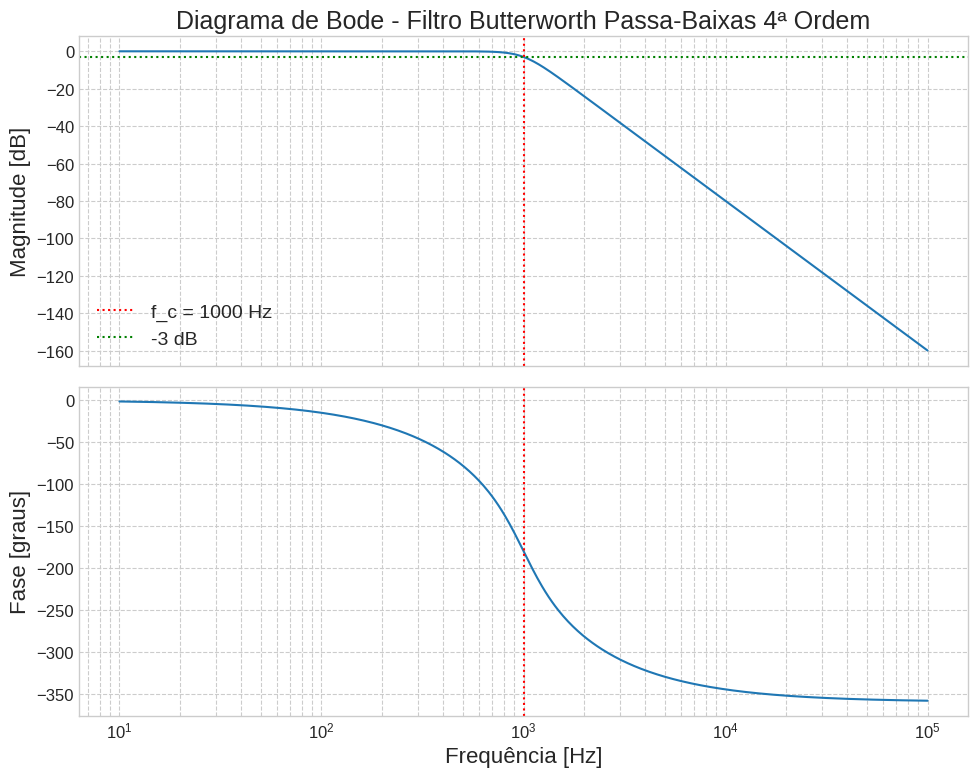

In [ ]:
# -*- coding: utf-8 -*-
# =============================================================================
# PROJETO DE FILTRO ATIVO SALLEN-KEY (PASSA-BAIXAS)
# Alinhado com a apresentação "Implementação de Filtros Analógicos"
# =============================================================================

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt # <--- IMPORTAÇÃO ADICIONADA

# =============================================================================
# Seção 1: Funções de Apoio para o Projeto
# =============================================================================

def calcular_componentes_sk_lpf(w0, Q, C_escolhido=10e-9):
    """
    Calcula os componentes para um estágio Sallen-Key Passa-Baixas
    usando a estratégia de componentes iguais (R1=R2=R, C1=C2=C).

    Args:
        w0 (float): Frequência natural (rad/s).
        Q (float): Fator de qualidade.
        C_escolhido (float): Valor do capacitor (C1=C2) em Farads.

    Returns:
        dict: Dicionário com os valores calculados dos componentes.
    """
    # Validação para garantir que o ganho K seja fisicamente realizável (K > 1)
    # A topologia com ganho requer Q > 0.5
    if Q <= 0.5:
        print(f"Aviso: O Fator de Qualidade Q={Q:.3f} é muito baixo para esta topologia com ganho.")
        return None

    # Equações de Projeto (Estratégia R1=R2, C1=C2)
    # K = 3 - 1/Q
    K = 3 - (1 / Q)

    # w0 = 1 / (R*C)  =>  R = 1 / (w0*C)
    R = 1 / (w0 * C_escolhido)

    # Malha de Ganho: K = 1 + (RB / RA)
    # Escolhe-se um valor prático para RA e calcula-se RB
    R_A = 10e3  # 10 kΩ (valor comum)
    R_B = R_A * (K - 1)

    return {
        'w0_rad_s': w0,
        'f0_hz': w0 / (2 * np.pi),
        'Q': Q,
        'K': K,
        'R': R,
        'C': C_escolhido,
        'R_A': R_A,
        'R_B': R_B
    }

def imprimir_relatorio_estagio(num_estagio, dados_projeto):
    """Formata e imprime os resultados do projeto para um estágio específico."""
    if dados_projeto is None:
        print(f"\n--- ESTÁGIO {num_estagio}: PROJETO INVÁLIDO ---")
        return

    print(f"\n" + "="*50)
    print(f"RELATÓRIO DE PROJETO: ESTÁGIO SALLEN-KEY LPF Nº {num_estagio}")
    print(f"="*50)
    print("PARÂMETROS DA SEÇÃO DE 2ª ORDEM (SOS):")
    print(f"  - Frequência Natural (f₀): {dados_projeto['f0_hz']:.2f} Hz")
    print(f"  - Fator de Qualidade (Q): {dados_projeto['Q']:.4f}")

    print("\nVALORES CALCULADOS DOS COMPONENTES:")
    print(f"  - Resistores (R₁=R₂): {dados_projeto['R']/1e3:.2f} kΩ")
    print(f"  - Capacitores (C₁=C₂): {dados_projeto['C']*1e9:.2f} nF (valor escolhido)")

    print("\nMALHA DE GANHO (K):")
    print(f"  - Ganho K necessário: {dados_projeto['K']:.4f}")
    print(f"  - Resistor RA: {dados_projeto['R_A']/1e3:.2f} kΩ (valor escolhido)")
    print(f"  - Resistor RB: {dados_projeto['R_B']/1e3:.2f} kΩ")
    print(f"="*50 + "\n")

# =============================================================================
# Seção 2: Execução Principal do Projeto
# =============================================================================

if __name__ == "__main__":
    # --- ETAPA 1: ESPECIFICAÇÕES DO PROJETO (Ex: Butterworth de 4ª Ordem) ---
    print(">>> PROJETO: FILTRO PASSA-BAIXAS BUTTERWORTH DE 4ª ORDEM <<<\n")

    ordem_filtro = 4
    freq_corte_hz = 1000  # Frequência de corte em Hz

    # Conversão para rad/s
    w_corte_rad_s = 2 * np.pi * freq_corte_hz

    # --- ETAPA 2: APROXIMAÇÃO MATEMÁTICA (Função de Transferência) ---
    # Gera os coeficientes do numerador (b) e denominador (a) para um filtro analógico
    b, a = signal.butter(ordem_filtro, w_corte_rad_s, btype='low', analog=True)

    print("Função de Transferência H(s) do filtro de 4ª ordem obtida.")

    # --- ETAPA 3: DECOMPOSIÇÃO EM SEÇÕES DE SEGUNDA ORDEM (SOS) ---
    # Converte H(s) em uma cascata de filtros de 2ª ordem
    sos = signal.tf2sos(b, a)

    print(f"H(s) decomposta em {len(sos)} seções de 2ª ordem (SOS).\n")

    # --- ETAPA 4: PROJETO DE CADA ESTÁGIO SALLEN-KEY ---
    # Itera sobre cada linha da matriz SOS para projetar um circuito

    # Escolha de um valor de capacitor prático e comum para todos os estágios
    C_fixo = 10e-9 # 10 nF

    for i, secao in enumerate(sos):
        num_estagio = i + 1

        # Os coeficientes da SOS do scipy.signal para filtros analógicos são:
        # [b0, b1, b2, a0, a1, a2]
        # O denominador é a0*s^2 + a1*s + a2. Normalizamos dividindo por a0.
        # Forma padrão: s^2 + (w0/Q)s + w0^2
        a0, a1, a2 = secao[3], secao[4], secao[5]

        # Cálculo de w0 e Q a partir dos coeficientes do denominador
        w0_sos = np.sqrt(a2 / a0)
        Q_sos = w0_sos / (a1 / a0)

        # --- ETAPA 5: CÁLCULO DOS COMPONENTES E RELATÓRIO ---
        # Calcula os valores de R, C e K para o estágio atual
        componentes = calcular_componentes_sk_lpf(w0_sos, Q_sos, C_escolhido=C_fixo)

        # Imprime o relatório para o estágio
        imprimir_relatorio_estagio(num_estagio, componentes)

    # =========================================================================
    # Seção 6: GERAÇÃO DO DIAGRAMA DE BODE (NOVO)
    # =========================================================================

    print("Gerando o Diagrama de Bode para o filtro completo...")

    # Cria um sistema LTI (Linear Time-Invariant) a partir dos coeficientes b e a
    sistema_lti = signal.lti(b, a)

    # Calcula a resposta em frequência (Bode)
    # Define uma faixa de frequências para o plot (de 10 Hz a 100 kHz)
    frequencias = np.logspace(1, 5, 500)
    w_bode = 2 * np.pi * frequencias
    w, mag, phase = signal.bode(sistema_lti, w_bode)

    # Cria a figura e os eixos para os dois plots (Magnitude e Fase)
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

    # --- Plot da Magnitude ---
    ax1.semilogx(w / (2*np.pi), mag)
    ax1.set_title(f'Diagrama de Bode - Filtro Butterworth Passa-Baixas {ordem_filtro}ª Ordem')
    ax1.set_ylabel('Magnitude [dB]')
    ax1.grid(which='both', linestyle='--')
    # Linhas de referência para a frequência de corte
    ax1.axvline(x=freq_corte_hz, color='r', linestyle=':', label=f'f_c = {freq_corte_hz} Hz')
    ax1.axhline(y=-3, color='g', linestyle=':', label='-3 dB')
    ax1.legend()

    # --- Plot da Fase ---
    ax2.semilogx(w / (2*np.pi), phase)
    ax2.set_xlabel('Frequência [Hz]')
    ax2.set_ylabel('Fase [graus]')
    ax2.grid(which='both', linestyle='--')
    # Linha de referência para a frequência de corte
    ax2.axvline(x=freq_corte_hz, color='r', linestyle=':', label=f'f_c = {freq_corte_hz} Hz')

    # Melhora o layout para evitar sobreposição de títulos
    plt.tight_layout()

    # Exibe o gráfico
    plt.show()